In [225]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
import os
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [128]:
df = pd.read_csv('/Users/veenakumar/Desktop/Projects/Luther/Luther_Data_Final.csv')
df = df.drop('Unnamed: 0',axis=1)

In [133]:
df['G'] = map(float,df['G'])

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [134]:
df = df.dropna()

In [146]:
df = df.drop(['Release_Date','Release_Month','Title','Genre','Distributor','MPAA_Rating'],axis=1)

In [150]:
df['Release_Yr'] = map(str,df['Release_Yr'])

In [165]:
distributors = ['Sony','Disney','Paramount','Lions Gate','Fox','Universal','Warner Bros']

In [163]:
df_sel = df[df['Distributor_Parsed'].isin(distributors)]

In [169]:
df_sel['Distributor'] = df_sel['Distributor_Parsed']
df_sel.drop('Distributor_Parsed',axis=1)

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Runtime,Domestic_Total,Production_Budget,Season,Release_Yr,Foreign,Total_Gross,Domestic_Percent,Foreign_Percent,Genre_Adventure,...,Genre_Romance,Genre_Horror,Genre_Documentary,Genre_Animation,Genre_Musical,G,PG,PG13,R,Distributor
0,109,1.143219e+08,105000000,Spring,2008,2.110724e+08,3.253943e+08,0.351333,0.648667,1,...,0,0,0,0,0,0.0,0.0,1.0,0.0,Warner Bros
1,100,6.446757e+07,130000000,Spring,2013,1.952718e+08,2.597394e+08,0.248201,0.751799,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,Sony
2,122,5.749394e+07,22000000,Summer,2014,3.671755e+07,9.421149e+07,0.610265,0.389735,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,Disney
3,104,1.075784e+08,85000000,Fall,2000,1.874267e+08,2.950052e+08,0.364666,0.635334,0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,Disney
4,97,7.981110e+07,37000000,Spring,2004,5.469878e+07,1.345099e+08,0.593348,0.406652,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,Sony
5,144,5.285322e+07,50000000,Winter,2016,1.655815e+07,6.941137e+07,0.761449,0.238551,0,...,0,0,0,0,0,0.0,0.0,0.0,1.0,Paramount
8,105,4.878045e+07,0,Spring,2006,3.803734e+07,8.681778e+07,0.561872,0.438128,1,...,0,1,0,0,0,0.0,0.0,1.0,0.0,Warner Bros
9,102,7.409158e+07,0,Spring,2009,8.325194e+07,1.573435e+08,0.470891,0.529109,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,Warner Bros
10,130,9.598559e+07,190000000,Spring,2015,1.188752e+08,2.148608e+08,0.446734,0.553266,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,Disney
11,158,1.918042e+08,200000000,Fall,2009,6.969190e+08,8.887232e+08,0.215820,0.784180,1,...,0,0,0,0,0,0.0,0.0,1.0,0.0,Sony


In [283]:
df_vars = df_sel

In [285]:
df_vars = df_vars.drop('Distributor_Parsed',axis=1)

In [286]:
df_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1699
Data columns (total 23 columns):
Runtime              1367 non-null int64
Domestic_Total       1367 non-null float64
Production_Budget    1367 non-null int64
Season               1367 non-null object
Release_Yr           1367 non-null object
Foreign              1367 non-null float64
Total_Gross          1367 non-null float64
Domestic_Percent     1367 non-null float64
Foreign_Percent      1367 non-null float64
Genre_Adventure      1367 non-null int64
Genre_SciFi          1367 non-null int64
Genre_Comedy         1367 non-null int64
Genre_Drama          1367 non-null int64
Genre_Romance        1367 non-null int64
Genre_Horror         1367 non-null int64
Genre_Documentary    1367 non-null int64
Genre_Animation      1367 non-null int64
Genre_Musical        1367 non-null int64
G                    1367 non-null float64
PG                   1367 non-null float64
PG13                 1367 non-null float64
R             

In [176]:
df_vars.corr()

,Runtime,Domestic_Total,Production_Budget,Foreign,Total_Gross,Domestic_Percent,Foreign_Percent,Genre_Adventure,Genre_SciFi,Genre_Comedy,...,Release_Yr_2014,Release_Yr_2015,Release_Yr_2016,Distributor_Disney,Distributor_Fox,Distributor_Lions Gate,Distributor_Paramount,Distributor_Sony,Distributor_Universal,Distributor_Warner Bros
Runtime,1.000000,0.294935,-0.071133,0.335528,0.335550,-0.145026,0.145026,0.205321,0.109908,-0.234104,...,0.048718,0.052876,-0.011292,-0.017443,-0.056082,-0.018945,0.015830,-0.046663,0.029539,0.082169
Domestic_Total,0.294935,1.000000,-0.032641,0.818211,0.920130,-0.176591,0.176591,0.184106,0.153905,-0.146226,...,0.000266,0.019814,-0.127482,0.149783,0.000014,-0.108164,0.014551,-0.070665,-0.013802,-0.003433
Production_Budget,-0.071133,-0.032641,1.000000,-0.028453,-0.031223,0.011210,-0.011210,-0.032383,-0.013571,-0.022157,...,-0.013152,0.066380,-0.012388,-0.020570,-0.003787,-0.011907,0.053608,-0.024378,0.027198,-0.020985
Foreign,0.335528,0.818211,-0.028453,1.000000,0.978006,-0.501269,0.501269,0.216978,0.187349,-0.253606,...,0.047645,0.065268,-0.002031,0.117976,0.048235,-0.091977,-0.018401,-0.072059,-0.032892,0.018655
Total_Gross,0.335550,0.920130,-0.031223,0.978006,1.000000,-0.405512,0.405512,0.214590,0.183451,-0.225797,...,0.032551,0.051646,-0.047633,0.134701,0.032861,-0.101893,-0.007255,-0.074720,-0.027412,0.011462
Domestic_Percent,-0.145026,-0.176591,0.011210,-0.501269,-0.405512,1.000000,-1.000000,-0.196799,-0.143968,0.298039,...,-0.047428,-0.060513,-0.200093,-0.013674,-0.090712,0.093642,0.053367,0.032310,0.012784,-0.045162
Foreign_Percent,0.145026,0.176591,-0.011210,0.501269,0.405512,-1.000000,1.000000,0.196799,0.143968,-0.298039,...,0.047428,0.060513,0.200093,0.013674,0.090712,-0.093642,-0.053367,-0.032310,-0.012784,0.045162
Genre_Adventure,0.205321,0.184106,-0.032383,0.216978,0.214590,-0.196799,0.196799,1.000000,0.144592,-0.239679,...,0.015067,-0.004454,0.005257,0.000851,-0.009415,0.005300,0.002395,0.003594,-0.026998,0.023927
Genre_SciFi,0.109908,0.153905,-0.013571,0.187349,0.183451,-0.143968,0.143968,0.144592,1.000000,-0.152666,...,0.034240,0.031251,-0.022402,-0.025885,0.039531,-0.045030,0.052126,-0.029175,0.007090,-0.014563
Genre_Comedy,-0.234104,-0.146226,-0.022157,-0.253606,-0.225797,0.298039,-0.298039,-0.239679,-0.152666,1.000000,...,-0.063011,-0.022901,-0.025091,-0.079004,0.046416,-0.016859,-0.073494,0.068149,0.069387,-0.028626


In [295]:
df_vars = pd.get_dummies(df_vars)

In [297]:
df_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1699
Data columns (total 48 columns):
Runtime                    1367 non-null int64
Domestic_Total             1367 non-null float64
Production_Budget          1367 non-null int64
Foreign                    1367 non-null float64
Total_Gross                1367 non-null float64
Domestic_Percent           1367 non-null float64
Foreign_Percent            1367 non-null float64
Genre_Adventure            1367 non-null int64
Genre_SciFi                1367 non-null int64
Genre_Comedy               1367 non-null int64
Genre_Drama                1367 non-null int64
Genre_Romance              1367 non-null int64
Genre_Horror               1367 non-null int64
Genre_Documentary          1367 non-null int64
Genre_Animation            1367 non-null int64
Genre_Musical              1367 non-null int64
G                          1367 non-null float64
PG                         1367 non-null float64
PG13                       1367 n

In [299]:
#Making the variables in the correct format to include into the patsy model.
Xs = [c for c in df_vars.columns]
'\") + Q(\"'.join(Xs)

'Runtime") + Q("Domestic_Total") + Q("Production_Budget") + Q("Foreign") + Q("Total_Gross") + Q("Domestic_Percent") + Q("Foreign_Percent") + Q("Genre_Adventure") + Q("Genre_SciFi") + Q("Genre_Comedy") + Q("Genre_Drama") + Q("Genre_Romance") + Q("Genre_Horror") + Q("Genre_Documentary") + Q("Genre_Animation") + Q("Genre_Musical") + Q("G") + Q("PG") + Q("PG13") + Q("R") + Q("Season_Fall") + Q("Season_Spring") + Q("Season_Summer") + Q("Season_Winter") + Q("Release_Yr_2000") + Q("Release_Yr_2001") + Q("Release_Yr_2002") + Q("Release_Yr_2003") + Q("Release_Yr_2004") + Q("Release_Yr_2005") + Q("Release_Yr_2006") + Q("Release_Yr_2007") + Q("Release_Yr_2008") + Q("Release_Yr_2009") + Q("Release_Yr_2010") + Q("Release_Yr_2011") + Q("Release_Yr_2012") + Q("Release_Yr_2013") + Q("Release_Yr_2014") + Q("Release_Yr_2015") + Q("Release_Yr_2016") + Q("Distributor_Disney") + Q("Distributor_Fox") + Q("Distributor_Lions Gate") + Q("Distributor_Paramount") + Q("Distributor_Sony") + Q("Distributor_Universa

In [327]:
#Take 1. 
y = df_vars['Foreign_Percent']
y, X = patsy.dmatrices('y ~ Q("Runtime") + Q("Production_Budget") + Q("Total_Gross") + Q("Genre_Adventure") + Q("Genre_SciFi") + Q("Genre_Comedy") + Q("Genre_Drama") + Q("Genre_Romance") + Q("Genre_Horror") + Q("Genre_Documentary") + Q("Genre_Animation") + Q("Genre_Musical") + Q("G") + Q("PG") + Q("PG13") + Q("R") + Q("Season_Fall") + Q("Season_Spring") + Q("Season_Summer") + Q("Season_Winter") + Q("Release_Yr_2000") + Q("Release_Yr_2001") + Q("Release_Yr_2002") + Q("Release_Yr_2003") + Q("Release_Yr_2004") + Q("Release_Yr_2005") + Q("Release_Yr_2006") + Q("Release_Yr_2007") + Q("Release_Yr_2008") + Q("Release_Yr_2009") + Q("Release_Yr_2010") + Q("Release_Yr_2011") + Q("Release_Yr_2012") + Q("Release_Yr_2013") + Q("Release_Yr_2014") + Q("Release_Yr_2015") + Q("Release_Yr_2016") + Q("Distributor_Disney") + Q("Distributor_Fox") + Q("Distributor_Lions Gate") + Q("Distributor_Paramount") + Q("Distributor_Sony") + Q("Distributor_Universal") + Q("Distributor_Warner Bros")', return_type="dataframe",data=df_vars)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     13.17
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.00e-65
Time:                        20:41:02   Log-Likelihood:                 344.97
No. Observations:                 956   AIC:                            -607.9
Df Residuals:                     915   BIC:                            -408.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        0.2054      0.026      7.793      0.000         0.154     0.257
Q("Runtime")                     0.0005      0.000      1.362      0.174        -0.000     0.001
Q("Production_Budget")       -6.089e-14   1.48e-13     -0.410      0.682     -3.52e-13   2.3e-13
Q("Total_Gross")              2.231e-10   2.52e-11      8.865      0.000      1.74e-10  2.73e-10
Q("Genre_Adventure")             0.0315      0.016      1.958      0.051      -7.7e-05     0.063
Q("Genre_SciFi")                 0.0285      0.024      1.179      0.239        -0.019     0.076
Q("Genre_Comedy")               -0.0965      0.017     -5.684      0.000        -0.130    -0.063
Q("Genre_Drama")                -0.0781      0.019     -4.077      0.000        -0.116    -0.040
Q("Genre_Romance")               0.0864      0.025      3.418      0.001         0.037     0.136
Q("Genre_Horror")                0.0212      0.020      1.058      0.290        -0.018     0.061
Q("Genre_Documentary")          -0.0191      0.082     -0.234      0.815        -0.179     0.141
Q("Genre_Animation")             0.0713      0.027      2.619      0.009         0.018     0.125
Q("Genre_Musical")              -0.0098      0.061     -0.161      0.872        -0.129     0.110
Q("G")                           0.0347      0.026      1.334      0.182        -0.016     0.086
Q("PG")                          0.0414      0.013      3.141      0.002         0.016     0.067
Q("PG13")                        0.0586      0.015      4.003      0.000         0.030     0.087
Q("R")                           0.0707      0.017      4.227      0.000         0.038     0.103
Q("Season_Fall")                 0.0596      0.012      4.776      0.000         0.035     0.084
Q("Season_Spring")               0.0348      0.012      2.874      0.004         0.011     0.058
Q("Season_Summer")               0.0694      0.012      5.900      0.000         0.046     0.093
Q("Season_Winter")               0.0416      0.012      3.603      0.000         0.019     0.064
Q("Release_Yr_2000")            -0.0436      0.024     -1.805      0.071        -0.091     0.004
Q("Release_Yr_2001")            -0.0965      0.024     -4.039      0.000        -0.143    -0.050
Q("Release_Yr_2002")            -0.0616      0.027     -2.316      0.021        -0.114    -0.009
Q("Release_Yr_2003")            -0.0127      0.022     -0.564      0.573        -0.057     0.031
Q("Release_Yr_2004")            -0.0194      0.023     -0.838      0.402        -0.065     0.026
Q("Release_Yr_2005")            -0.0209      0.023     -0.906      0.365        -0.066     0.024
Q("Release_Yr_2006")            -0.0026      0.022     -0.118      0.906        -0.046     0.041
Q("Release_Yr_2007")             0.0132      0.022      0.610      0.542    

In [357]:

y = df_vars['Foreign_Percent']
y, X = patsy.dmatrices('y ~ Q("Runtime") + Q("Production_Budget") + Q("Total_Gross") + Q("Genre_Adventure") + Q("Genre_SciFi") + Q("Genre_Comedy") + Q("Genre_Drama") + Q("Genre_Romance") + Q("Genre_Horror")  + Q("Genre_Animation")  + Q("G") + Q("PG") + Q("PG13") + Q("R") + Q("Season_Fall") + Q("Season_Spring") + Q("Season_Summer") + Q("Season_Winter") + Q("Release_Yr_2000") + Q("Release_Yr_2001") + Q("Release_Yr_2002") + Q("Release_Yr_2003") + Q("Release_Yr_2004") + Q("Release_Yr_2005") + Q("Release_Yr_2006") + Q("Release_Yr_2007")  + Q("Release_Yr_2009") + Q("Release_Yr_2010") + Q("Release_Yr_2011") + Q("Release_Yr_2012") + Q("Release_Yr_2013") + Q("Release_Yr_2014") + Q("Release_Yr_2015") + Q("Release_Yr_2016") + Q("Distributor_Disney") + Q("Distributor_Fox") + Q("Distributor_Lions Gate") + Q("Distributor_Paramount") + Q("Distributor_Sony") + Q("Distributor_Universal") + Q("Distributor_Warner Bros")', return_type="dataframe",data=df_vars)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     14.57
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           3.89e-70
Time:                        21:03:32   Log-Likelihood:                 375.10
No. Observations:                 956   AIC:                            -672.2
Df Residuals:                     917   BIC:                            -482.5
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        0.1901      0.030      6.415      0.000         0.132     0.248
Q("Runtime")                     0.0008      0.000      1.938      0.053     -9.68e-06     0.002
Q("Production_Budget")       -7.369e-14   1.44e-13     -0.512      0.609     -3.56e-13  2.09e-13
Q("Total_Gross")              1.995e-10   2.33e-11      8.567      0.000      1.54e-10  2.45e-10
Q("Genre_Adventure")             0.0472      0.015      3.186      0.001         0.018     0.076
Q("Genre_SciFi")                 0.0295      0.023      1.291      0.197        -0.015     0.074
Q("Genre_Comedy")               -0.0922      0.016     -5.706      0.000        -0.124    -0.060
Q("Genre_Drama")                -0.0719      0.018     -3.975      0.000        -0.107    -0.036
Q("Genre_Romance")               0.0873      0.023      3.782      0.000         0.042     0.133
Q("Genre_Horror")                0.0390      0.019      2.062      0.040         0.002     0.076
Q("Genre_Animation")             0.0702      0.028      2.539      0.011         0.016     0.125
Q("G")                           0.0409      0.027      1.519      0.129        -0.012     0.094
Q("PG")                          0.0411      0.014      2.963      0.003         0.014     0.068
Q("PG13")                        0.0486      0.015      3.296      0.001         0.020     0.078
Q("R")                           0.0595      0.017      3.572      0.000         0.027     0.092
Q("Season_Fall")                 0.0531      0.012      4.260      0.000         0.029     0.078
Q("Season_Spring")               0.0358      0.013      2.835      0.005         0.011     0.061
Q("Season_Summer")               0.0609      0.012      5.223      0.000         0.038     0.084
Q("Season_Winter")               0.0403      0.012      3.405      0.001         0.017     0.064
Q("Release_Yr_2000")            -0.0294      0.032     -0.916      0.360        -0.092     0.034
Q("Release_Yr_2001")            -0.0994      0.030     -3.263      0.001        -0.159    -0.040
Q("Release_Yr_2002")            -0.0492      0.032     -1.540      0.124        -0.112     0.014
Q("Release_Yr_2003")            -0.0178      0.031     -0.569      0.570        -0.079     0.044
Q("Release_Yr_2004")            -0.0110      0.031     -0.351      0.726        -0.073     0.051
Q("Release_Yr_2005")            -0.0252      0.032     -0.788      0.431        -0.088     0.038
Q("Release_Yr_2006")            -0.0412      0.031     -1.333      0.183        -0.102     0.019
Q("Release_Yr_2007")            -0.0025      0.030     -0.082      0.934        -0.062     0.057
Q("Release_Yr_2009")            -0.0128      0.030     -0.426      0.670        -0.072     0.046
Q("Release_Yr_2010")             0.0553      0.030      1.825      0.068    

In [341]:
df_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1699
Data columns (total 48 columns):
Runtime                    1367 non-null int64
Domestic_Total             1367 non-null float64
Production_Budget          1367 non-null int64
Foreign                    1367 non-null float64
Total_Gross                1367 non-null float64
Domestic_Percent           1367 non-null float64
Foreign_Percent            1367 non-null float64
Genre_Adventure            1367 non-null int64
Genre_SciFi                1367 non-null int64
Genre_Comedy               1367 non-null int64
Genre_Drama                1367 non-null int64
Genre_Romance              1367 non-null int64
Genre_Horror               1367 non-null int64
Genre_Documentary          1367 non-null int64
Genre_Animation            1367 non-null int64
Genre_Musical              1367 non-null int64
G                          1367 non-null float64
PG                         1367 non-null float64
PG13                       1367 n

In [344]:
dftest = df_vars.drop(['Total_Gross','Release_Yr_2008','Release_Yr_2006','Release_Yr_2005','Release_Yr_2007','Genre_Musical','Genre_Documentary'],axis=1)

In [350]:
dftest = dftest.drop(['Domestic_Percent','Foreign','Domestic_Total'],axis=1)

In [351]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1699
Data columns (total 38 columns):
Runtime                    1367 non-null int64
Production_Budget          1367 non-null int64
Foreign_Percent            1367 non-null float64
Genre_Adventure            1367 non-null int64
Genre_SciFi                1367 non-null int64
Genre_Comedy               1367 non-null int64
Genre_Drama                1367 non-null int64
Genre_Romance              1367 non-null int64
Genre_Horror               1367 non-null int64
Genre_Animation            1367 non-null int64
G                          1367 non-null float64
PG                         1367 non-null float64
PG13                       1367 non-null float64
R                          1367 non-null float64
Season_Fall                1367 non-null float64
Season_Spring              1367 non-null float64
Season_Summer              1367 non-null float64
Season_Winter              1367 non-null float64
Release_Yr_2000            13

In [353]:
#Making the variables in the correct format to include into the patsy model.
Xs = [c for c in dftest.columns]
'\") + Q(\"'.join(Xs)

'Runtime") + Q("Production_Budget") + Q("Foreign_Percent") + Q("Genre_Adventure") + Q("Genre_SciFi") + Q("Genre_Comedy") + Q("Genre_Drama") + Q("Genre_Romance") + Q("Genre_Horror") + Q("Genre_Animation") + Q("G") + Q("PG") + Q("PG13") + Q("R") + Q("Season_Fall") + Q("Season_Spring") + Q("Season_Summer") + Q("Season_Winter") + Q("Release_Yr_2000") + Q("Release_Yr_2001") + Q("Release_Yr_2002") + Q("Release_Yr_2003") + Q("Release_Yr_2004") + Q("Release_Yr_2009") + Q("Release_Yr_2010") + Q("Release_Yr_2011") + Q("Release_Yr_2012") + Q("Release_Yr_2013") + Q("Release_Yr_2014") + Q("Release_Yr_2015") + Q("Release_Yr_2016") + Q("Distributor_Disney") + Q("Distributor_Fox") + Q("Distributor_Lions Gate") + Q("Distributor_Paramount") + Q("Distributor_Sony") + Q("Distributor_Universal") + Q("Distributor_Warner Bros'

In [354]:
y = df_vars['Foreign_Percent']
y, X = patsy.dmatrices('y ~ Q("Runtime") + Q("Production_Budget") + Q("Genre_Adventure") + Q("Genre_SciFi") + Q("Genre_Comedy") + Q("Genre_Drama") + Q("Genre_Romance") + Q("Genre_Horror") + Q("Genre_Animation") + Q("G") + Q("PG") + Q("PG13") + Q("R") + Q("Season_Fall") + Q("Season_Spring") + Q("Season_Summer") + Q("Season_Winter") + Q("Release_Yr_2000") + Q("Release_Yr_2001") + Q("Release_Yr_2002") + Q("Release_Yr_2003") + Q("Release_Yr_2004") + Q("Release_Yr_2009") + Q("Release_Yr_2010") + Q("Release_Yr_2011") + Q("Release_Yr_2012") + Q("Release_Yr_2013") + Q("Release_Yr_2014") + Q("Release_Yr_2015") + Q("Release_Yr_2016") + Q("Distributor_Disney") + Q("Distributor_Fox") + Q("Distributor_Lions Gate") + Q("Distributor_Paramount") + Q("Distributor_Sony") + Q("Distributor_Universal") + Q("Distributor_Warner Bros")', return_type="dataframe",data=dftest)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     10.68
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.68e-46
Time:                        21:02:00   Log-Likelihood:                 289.99
No. Observations:                 956   AIC:                            -510.0
Df Residuals:                     921   BIC:                            -339.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        0.1876      0.028      6.638      0.000         0.132     0.243
Q("Runtime")                     0.0015      0.000      3.902      0.000         0.001     0.002
Q("Production_Budget")       -4.445e-14   1.58e-13     -0.282      0.778     -3.54e-13  2.65e-13
Q("Genre_Adventure")             0.0415      0.016      2.607      0.009         0.010     0.073
Q("Genre_SciFi")                 0.0429      0.025      1.717      0.086        -0.006     0.092
Q("Genre_Comedy")               -0.1154      0.018     -6.565      0.000        -0.150    -0.081
Q("Genre_Drama")                -0.0877      0.019     -4.664      0.000        -0.125    -0.051
Q("Genre_Romance")               0.0719      0.027      2.680      0.007         0.019     0.125
Q("Genre_Horror")                0.0069      0.020      0.344      0.731        -0.032     0.046
Q("Genre_Animation")             0.0853      0.029      2.980      0.003         0.029     0.141
Q("G")                           0.0576      0.027      2.111      0.035         0.004     0.111
Q("PG")                          0.0412      0.015      2.834      0.005         0.013     0.070
Q("PG13")                        0.0456      0.015      2.952      0.003         0.015     0.076
Q("R")                           0.0432      0.017      2.485      0.013         0.009     0.077
Q("Season_Fall")                 0.0450      0.013      3.506      0.000         0.020     0.070
Q("Season_Spring")               0.0390      0.013      2.904      0.004         0.013     0.065
Q("Season_Summer")               0.0807      0.012      6.522      0.000         0.056     0.105
Q("Season_Winter")               0.0229      0.012      1.895      0.058        -0.001     0.047
Q("Release_Yr_2000")            -0.0380      0.029     -1.297      0.195        -0.096     0.020
Q("Release_Yr_2001")            -0.1059      0.027     -3.969      0.000        -0.158    -0.054
Q("Release_Yr_2002")            -0.0795      0.028     -2.884      0.004        -0.134    -0.025
Q("Release_Yr_2003")            -0.0315      0.027     -1.170      0.242        -0.084     0.021
Q("Release_Yr_2004")            -0.0164      0.027     -0.605      0.546        -0.070     0.037
Q("Release_Yr_2009")             0.0018      0.025      0.071      0.943        -0.048     0.052
Q("Release_Yr_2010")             0.0360      0.028      1.299      0.194        -0.018     0.090
Q("Release_Yr_2011")             0.0636      0.029      2.176      0.030         0.006     0.121
Q("Release_Yr_2012")             0.0373      0.027      1.392      0.164        -0.015     0.090
Q("Release_Yr_2013")             0.0731      0.027      2.709      0.007         0.020     0.126
Q("Release_Yr_2014")             0.0408      0.029      1.429      0.153    

In [ ]:
sns.pairplot(df_vars)

In [358]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.grid_search import GridSearchCV

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


ERROR! Session/line number was not unique in database. History logging moved to new session 156


In [359]:
df_vars.to_csv('/Users/veenakumar/Desktop/Projects/Luther/Luther_AlteredAgain.csv')

In [352]:
#Take 3. 
lm1 = smf.ols('y ~ Q("Runtime")+Q("Genre_Adventure")+Q("Genre_Comedy")+Q("Genre_Drama")+Q("Genre_Romance")+Q("Genre_Animation")+Q("PG")+Q("PG13")+Q("R")+Q("Season_Fall")+Q("Season_Spring")+Q("Season_Summer")+Q("Season_Winter")+Q("Distributor_Fox")+Q("Distributor_Lions Gate")+Q("Distributor_Sony")+Q("Distributor_Universal")+Q("Distributor_Warner Bros")', data=df_vars)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     20.83
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           5.08e-57
Time:                        20:59:42   Log-Likelihood:                 345.88
No. Observations:                1367   AIC:                            -655.8
Df Residuals:                    1349   BIC:                            -561.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        0.1992      0.034      5.863      0.000         0.133     0.266
Q("Runtime")                     0.0017      0.000      5.276      0.000         0.001     0.002
Q("Genre_Adventure")             0.0517      0.013      3.971      0.000         0.026     0.077
Q("Genre_Comedy")               -0.1154      0.013     -9.097      0.000        -0.140    -0.091
Q("Genre_Drama")                -0.1044      0.015     -6.792      0.000        -0.135    -0.074
Q("Genre_Romance")               0.0578      0.022      2.604      0.009         0.014     0.101
Q("Genre_Animation")             0.1290      0.023      5.553      0.000         0.083     0.175
Q("PG")                          0.0180      0.028      0.644      0.520        -0.037     0.073
Q("PG13")                        0.0326      0.030      1.099      0.272        -0.026     0.091
Q("R")                           0.0259      0.030      0.855      0.393        -0.034     0.085
Q("Season_Fall")                 0.0455      0.013      3.587      0.000         0.021     0.070
Q("Season_Spring")               0.0394      0.013      3.114      0.002         0.015     0.064
Q("Season_Summer")               0.0820      0.012      6.615      0.000         0.058     0.106
Q("Season_Winter")               0.0324      0.012      2.729      0.006         0.009     0.056
Q("Distributor_Fox")             0.0843      0.016      5.147      0.000         0.052     0.116
Q("Distributor_Lions Gate")     -0.0473      0.026     -1.814      0.070        -0.098     0.004
Q("Distributor_Sony")            0.0293      0.016      1.804      0.071        -0.003     0.061
Q("Distributor_Universal")       0.0309      0.017      1.803      0.072        -0.003     0.065
Q("Distributor_Warner Bros")     0.0460      0.016      2.927      0.003         0.015     0.077
==============================================================================
Omnibus:                       16.851   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.026
Skew:                           0.083   Prob(JB):                     2.23e-06
Kurtosis:                       3.655   Cond. No.                     7.22e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [324]:
dffeat = df_vars[['Foreign_Percent','Production_Budget','Runtime','Genre_Adventure','Genre_Comedy','Genre_Drama','Genre_Romance','Genre_Animation','PG','PG13','R','Season_Fall','Season_Spring','Season_Winter','Season_Summer']]

In [321]:
lm1 = smf.ols('y ~ Q("Runtime")+Q("Genre_Adventure")+Q("Genre_Comedy")+Q("Genre_Drama")+Q("Genre_Romance")+Q("Genre_Animation")+Q("PG")+Q("PG13")+Q("R")+Q("Season_Fall")+Q("Season_Spring")+Q("Season_Summer")+Q("Season_Winter")', data=dffeat)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     25.58
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.26e-52
Time:                        20:38:13   Log-Likelihood:                 326.21
No. Observations:                1367   AIC:                            -626.4
Df Residuals:                    1354   BIC:                            -558.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.2144      0.034      6.314      0.000         0.148     0.281
Q("Runtime")             0.0017      0.000      5.209      0.000         0.001     0.002
Q("Genre_Adventure")     0.0515      0.013      3.916      0.000         0.026     0.077
Q("Genre_Comedy")       -0.1109      0.013     -8.665      0.000        -0.136    -0.086
Q("Genre_Drama")        -0.1037      0.016     -6.671      0.000        -0.134    -0.073
Q("Genre_Romance")       0.0557      0.022      2.487      0.013         0.012     0.100
Q("Genre_Animation")     0.1244      0.023      5.305      0.000         0.078     0.170
Q("PG")                  0.0321      0.028      1.148      0.251        -0.023     0.087
Q("PG13")                0.0428      0.029      1.458      0.145        -0.015     0.100
Q("R")                   0.0383      0.030      1.280      0.201        -0.020     0.097
Q("Season_Fall")         0.0478      0.013      3.759      0.000         0.023     0.073
Q("Season_Spring")       0.0411      0.013      3.221      0.001         0.016     0.066
Q("Season_Summer")       0.0885      0.012      7.118      0.000         0.064     0.113
Q("Season_Winter")       0.0371      0.012      3.106      0.002         0.014     0.060
==============================================================================
Omnibus:                       13.750   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.988
Skew:                           0.036   Prob(JB):                     2.77e-05
Kurtosis:                       3.603   Cond. No.                     7.12e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [326]:
#Take 5. 
y = df_vars['Foreign_Percent']
y, X = patsy.dmatrices('y ~ Q("Production_Budget")+Q("Runtime")+Q("Genre_Adventure")+Q("Genre_Comedy")+Q("Genre_Drama")+Q("Genre_Romance")+Q("Genre_Animation")+Q("PG")+Q("PG13")+Q("R")+Q("Season_Fall")+Q("Season_Spring")+Q("Season_Summer")+Q("Season_Winter")', return_type="dataframe",data=dffeat)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     17.21
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           5.66e-36
Time:                        20:40:23   Log-Likelihood:                 224.29
No. Observations:                 956   AIC:                            -420.6
Df Residuals:                     942   BIC:                            -352.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.2254      0.041      5.535      0.000         0.146     0.305
Q("Production_Budget") -6.175e-14   1.64e-13     -0.377      0.706     -3.83e-13  2.59e-13
Q("Runtime")               0.0016      0.000      4.089      0.000         0.001     0.002
Q("Genre_Adventure")       0.0684      0.016      4.298      0.000         0.037     0.100
Q("Genre_Comedy")         -0.1021      0.015     -6.660      0.000        -0.132    -0.072
Q("Genre_Drama")          -0.1070      0.019     -5.763      0.000        -0.143    -0.071
Q("Genre_Romance")         0.0488      0.027      1.840      0.066        -0.003     0.101
Q("Genre_Animation")       0.1372      0.028      4.892      0.000         0.082     0.192
Q("PG")                    0.0224      0.034      0.667      0.505        -0.044     0.088
Q("PG13")                  0.0253      0.035      0.725      0.469        -0.043     0.094
Q("R")                     0.0257      0.036      0.721      0.471        -0.044     0.096
Q("Season_Fall")           0.0551      0.015      3.641      0.000         0.025     0.085
Q("Season_Spring")         0.0547      0.015      3.537      0.000         0.024     0.085
Q("Season_Summer")         0.0858      0.015      5.674      0.000         0.056     0.116
Q("Season_Winter")         0.0298      0.014      2.084      0.037         0.002     0.058
==============================================================================
Omnibus:                       12.732   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.525
Skew:                           0.111   Prob(JB):                     9.49e-05
Kurtosis:                       3.645   Cond. No.                     1.42e+26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [323]:
#Take 4. 
lm1 = smf.ols('y ~ Q("Runtime")+Q("Genre_Adventure")+Q("Genre_Comedy")+Q("Genre_Drama")+Q("Genre_Romance")+Q("Genre_Animation")+Q("PG")+Q("PG13")+Q("R")+Q("Season_Fall")+Q("Season_Spring")+Q("Season_Summer")+Q("Season_Winter")', data=df_vars)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     25.58
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.26e-52
Time:                        20:39:07   Log-Likelihood:                 326.21
No. Observations:                1367   AIC:                            -626.4
Df Residuals:                    1354   BIC:                            -558.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.2144      0.034      6.314      0.000         0.148     0.281
Q("Runtime")             0.0017      0.000      5.209      0.000         0.001     0.002
Q("Genre_Adventure")     0.0515      0.013      3.916      0.000         0.026     0.077
Q("Genre_Comedy")       -0.1109      0.013     -8.665      0.000        -0.136    -0.086
Q("Genre_Drama")        -0.1037      0.016     -6.671      0.000        -0.134    -0.073
Q("Genre_Romance")       0.0557      0.022      2.487      0.013         0.012     0.100
Q("Genre_Animation")     0.1244      0.023      5.305      0.000         0.078     0.170
Q("PG")                  0.0321      0.028      1.148      0.251        -0.023     0.087
Q("PG13")                0.0428      0.029      1.458      0.145        -0.015     0.100
Q("R")                   0.0383      0.030      1.280      0.201        -0.020     0.097
Q("Season_Fall")         0.0478      0.013      3.759      0.000         0.023     0.073
Q("Season_Spring")       0.0411      0.013      3.221      0.001         0.016     0.066
Q("Season_Summer")       0.0885      0.012      7.118      0.000         0.064     0.113
Q("Season_Winter")       0.0371      0.012      3.106      0.002         0.014     0.060
==============================================================================
Omnibus:                       13.750   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.988
Skew:                           0.036   Prob(JB):                     2.77e-05
Kurtosis:                       3.603   Cond. No.                     7.12e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

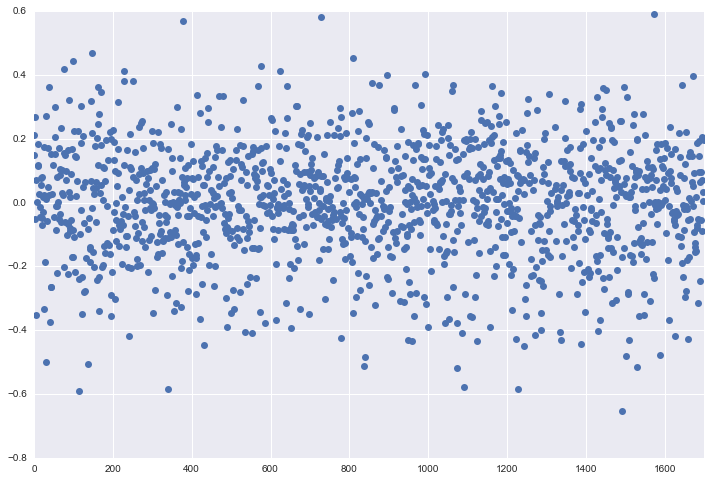

In [210]:
fit1.resid.plot(style='o', figsize=(12,8))

In [270]:
lr = LinearRegression()
X = df_vars.iloc[:, 2:]
y = df_vars.iloc[:, 1]
lr.fit(X, y)
lr.score(X,y)

0.41571544958191275

In [276]:
df_vars.corr()['Foreign_Percent'].sort_values(ascending=False)

Foreign_Percent                   1.000000
Foreign                           0.501269
Total_Gross                       0.405512
Release_Yr_2016                   0.200093
Genre_Adventure                   0.196799
Domestic_Total                    0.176591
Genre_Animation                   0.164556
Runtime                           0.145026
Genre_SciFi                       0.143968
Season_Summer                     0.111180
Distributor_Parsed_Fox            0.090712
Distributor_Fox                   0.090712
Release_Yr_2013                   0.072795
Release_Yr_2011                   0.064836
Release_Yr_2015                   0.060513
Genre_Horror                      0.050635
Release_Yr_2014                   0.047428
Distributor_Parsed_Warner Bros    0.045162
Distributor_Warner Bros           0.045162
Release_Yr_2010                   0.038710
PG                                0.031115
Release_Yr_2012                   0.023082
Distributor_Disney                0.013674
Distributor

In [291]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
  
scaler = StandardScaler()
X = scaler.fit_transform(df_vars["Runtime"])
Y = df_vars['Foreign_Percent']
  
lasso = Lasso(alpha=.3)
lasso.fit(X, Y)

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/veenakumar/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/veenakumar/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Us

ValueError: Found input variables with inconsistent numbers of samples: [1, 1367]

In [279]:
lasso.coef_

array([ 0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,
        0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
       -0., -0.,  0.])

In [271]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 5)}              
clf = RandomForestRegressor(n_estimators=100)
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1559cb910>, 'max_depth': [10, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

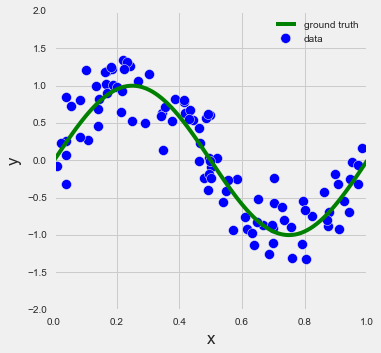

In [233]:
from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

np.random.seed(9)

def f(x):
    return np.sin(2 * np.pi * x)

# generate points used to plot
# This returns 100 evenly spaced numbers from 0 to 1
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

In [234]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

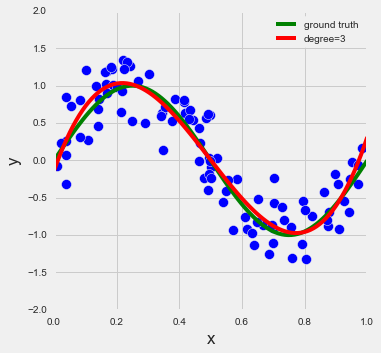

In [235]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 3
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

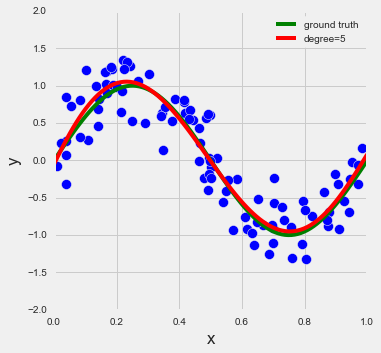

In [264]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 5
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

In [272]:
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.3558016333873868

In [273]:
lr1 = LinearRegression()
lr1.fit(X, y)
lr1.score(X, y)

0.41571544958191275

In [274]:
from sklearn.metrics import mean_squared_error

# Step through degrees from 0 to 9 and store the training and test (generalization) error.
train_error = np.empty(10)
test_error = np.empty(10)
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

# Plot the training and test errors against degree
plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')

KeyboardInterrupt: 

KeyboardInterrupt: 

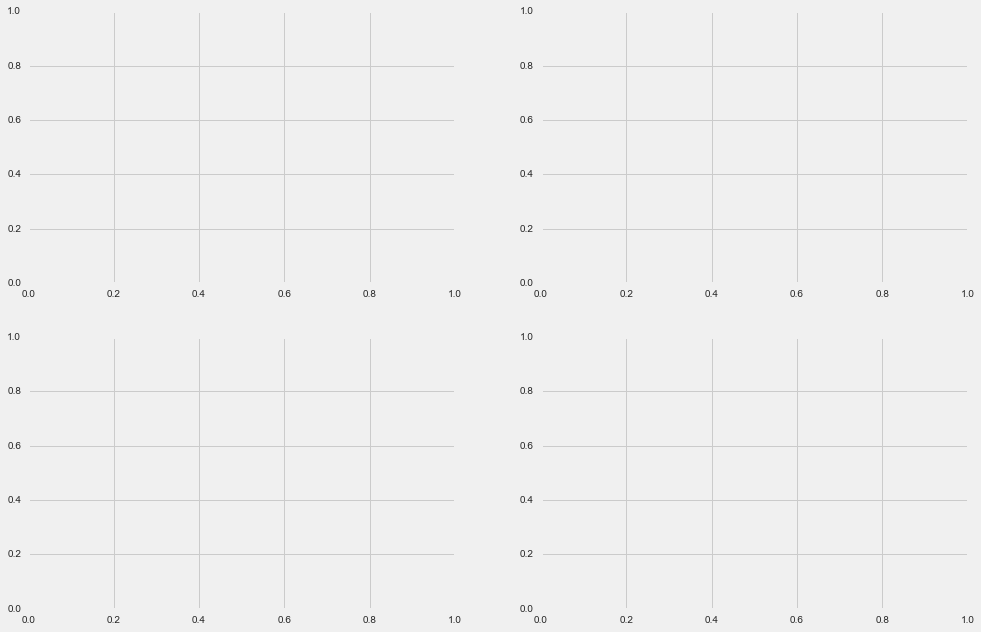

In [275]:
from sklearn.linear_model import Lasso

# Create only 2 plot rows, only trying 2 alphas
fig, ax_rows = plt.subplots(2, 2, figsize=(15, 10))

# Plot the results next to the coefficient values for each of hte 2 alphas
degree = 9
alphas = [1e-3, 1e-2]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Lasso(alpha=%r) coefficients' % alpha, yscale=None)

plt.tight_layout()